<a href="https://colab.research.google.com/github/drsunithaev/DL_FDP/blob/main/Deep_nw_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
os.chdir('/content/drive/MyDrive/DL_FDP_Jan 2023')

In [3]:
pwd()

'/content/drive/MyDrive/DL_FDP_Jan 2023'

# Set up a Deep Neural Network

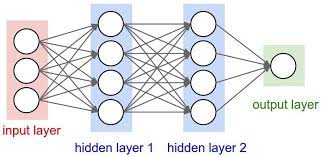

## Read dataset

In [4]:
import tensorflow as tf

In [5]:
data = tf.keras.datasets.mnist

In [6]:
type(data)

module

In [7]:
(X_train, y_train) , (X_test, y_test)= data.load_data()

In [16]:
type(y_train)

numpy.ndarray

In [17]:
X_train.shape

(60000, 28, 28)

In [18]:
y_train.shape

(60000,)

In [19]:
X_test.shape

(10000, 28, 28)

In [20]:
y_test.shape

(10000,)

In [22]:
y_train[0]

5

## What is MNIST dataset

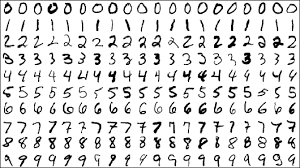

In [8]:
import matplotlib.pyplot as plt


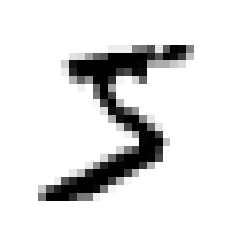

In [10]:
plt.imshow(X_train[0],cmap='binary')
plt.axis('off')
plt.show()

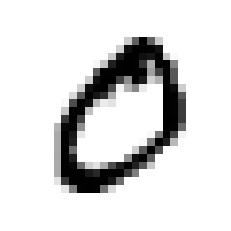

In [11]:
plt.imshow(X_train[1],cmap='binary')
plt.axis('off')
plt.show()

In [12]:
y_train[1]

0

## pixel values

In [13]:
import seaborn as sns

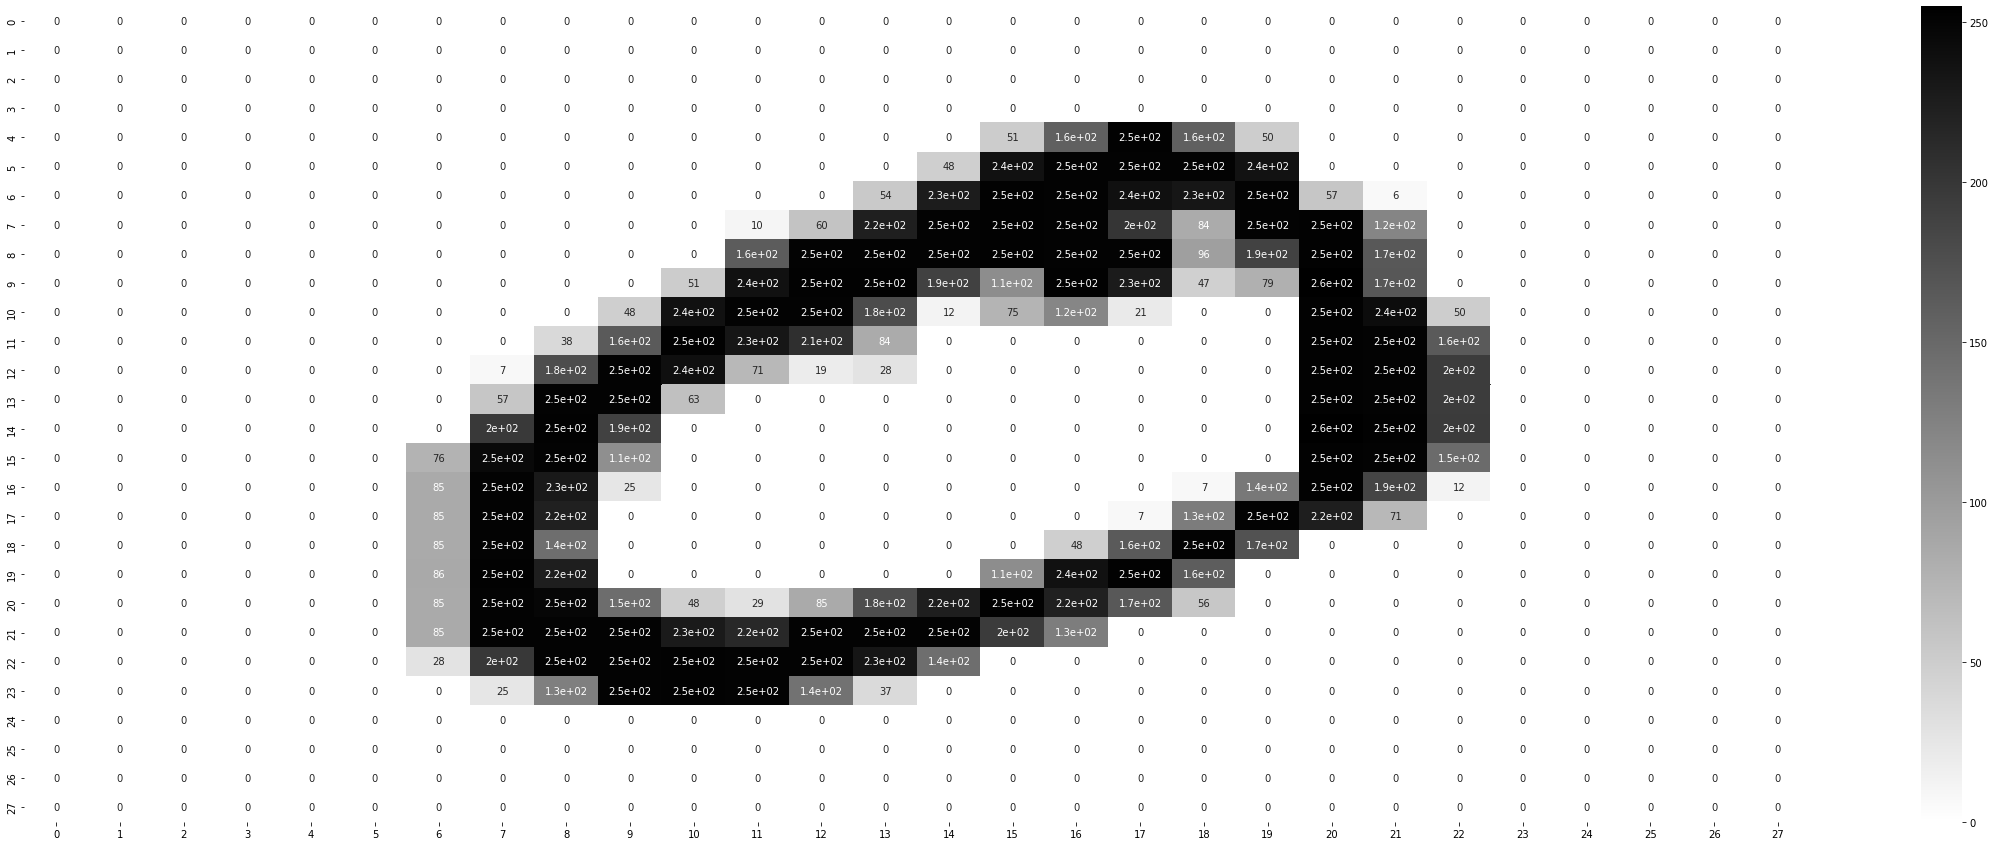

In [21]:
plt.figure(figsize=(40,15))
sns.heatmap(X_train[1],annot=True,cmap='binary')

In [22]:
X_train = X_train/255.0

In [27]:
X_test = X_test/255.

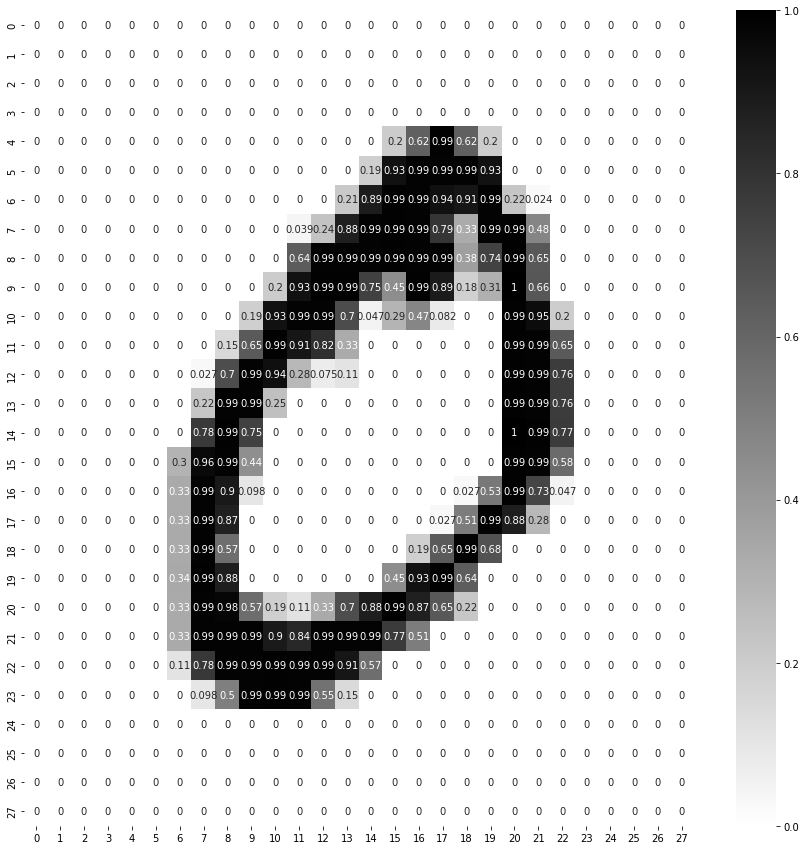

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[1],annot=True,cmap='binary')

In [28]:
X_valid, X_train = X_train[:5000],X_train[5000:]
y_valid, y_train = y_train[:5000],y_train[5000:]

# CREATE MODEL

## Create Layers

In [35]:
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28], name="input_layer"),
        tf.keras.layers.Dense(300,activation='relu' ,name="hidden_layer_1"),
        tf.keras.layers.Dense(100, activation='relu',name="hidden_layer_2"),
        tf.keras.layers.Dense(10, activation='softmax', name="output_layer")]

In [56]:
mnist_model = tf.keras.models.Sequential(LAYERS)

In [38]:
mnist_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 300)               235500    
                                                                 
 hidden_layer_2 (Dense)      (None, 100)               30100     
                                                                 
 output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [39]:
LOSS_FUNCTION = 'sparse_categorical_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']

In [57]:
mnist_model.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

In [41]:
mnist_model.layers

In [42]:
mnist_model.layers[0]

In [43]:
mnist_model.layers[1]

In [44]:
mnist_model.layers[1].name

'hidden_layer_1'

In [48]:
w,b = mnist_model.layers[1].get_weights()
#w,b = mnist_model.layers[1].weights

In [49]:
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [50]:
w

array([[ 0.06402528, -0.07260624, -0.02660116, ..., -0.04659649,
         0.00594936, -0.03716049],
       [-0.01127574, -0.06751767,  0.06357299, ..., -0.0185643 ,
         0.02753715,  0.07130338],
       [ 0.02808842,  0.02050962, -0.00692896, ..., -0.06962384,
         0.06267422, -0.06194674],
       ...,
       [-0.06116039, -0.02076963, -0.00838383, ..., -0.05831577,
        -0.01695983,  0.00866406],
       [-0.02414363, -0.052811  , -0.01435681, ..., -0.03476041,
        -0.07192435, -0.03117169],
       [ 0.01720826, -0.03129584, -0.057787  , ..., -0.00459307,
        -0.07208949, -0.06695538]], dtype=float32)

In [58]:
EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)

In [59]:
history = mnist_model.fit(X_train, y_train, epochs=EPOCHS, validation_data= VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.1198 - val_accuracy: 0.9760
Epoch 2/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0119 - accuracy: 0.9966 - val_loss: 0.0901 - val_accuracy: 0.9848
Epoch 3/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0111 - accuracy: 0.9962 - val_loss: 0.1258 - val_accuracy: 0.9762
Epoch 4/5
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0148 - accuracy: 0.9953 - val_loss: 0.0941 - val_accuracy: 0.9820
Epoch 5/5
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0093 - accuracy: 0.9973 - val_loss: 0.1361 - val_accuracy: 0.9764


In [53]:
X_train.shape

(55000, 28, 28)

In [60]:
mnist_model.save("Model_v1.h5")

In [74]:
y_predict = mnist_model.predict(X_test[2])

1/1 [==============================] - 0s 22ms/step


In [75]:
y_predict

array([[3.1822965e-17, 9.9999988e-01, 2.0156758e-11, 6.3366799e-12,
        9.0851583e-11, 1.1430099e-11, 1.6262063e-11, 1.1365090e-07,
        9.1344926e-10, 5.2739204e-13]], dtype=float32)

In [65]:
import numpy as np

In [76]:
np.argmax(y_predict)
#returns the index of max value

1

In [77]:
y_test[2]

1